In [94]:
import numpy as np
from numpy import number
from scipy.linalg import solve_banded
import matplotlib.pyplot as plt

In [95]:
q, V, w = 2, 4, 1

alpha, beta = 0, 0
a, b, end_time = -20, 20, 1

N, T = 201, 401

x = np.linspace(a, b, N)
dx = (b-a)/(N-1)

t = np.linspace(0, end_time, T)
dt = end_time/(T-1)

In [96]:
u_exact = w * np.sqrt(2./q) * np.exp(1j * (0.5 * V * np.ones((T, 1)) * x.reshape((1, N)) - 0.25 * (V * V - w * w) * t.reshape((T, 1)) * np.ones((1, N))))
u_exact = u_exact / np.cosh(w * (np.ones((T, 1)) * x.reshape((1, N)) - V * t.reshape((T, 1)) * np.ones((1, N))))

In [97]:
def fd_rhs(u, _dx, _q, _alpha, _beta):
    n = np.size(u)
    f = np.zeros(n, dtype=np.complex_)
    dx2 = _dx ** 2
    # inner nodes
    for i in range(1, n-1):
        f[i] = 1j * ((u[i+1] - 2 * u[i] + u[i-1])/dx2 + _q * np.square(np.abs(u[i])) * u[i])
    # left node i = 0
    i = 0
    f[i] = 1j * (2 * (u[i+1] - u[i] - _dx * _alpha) / dx2 + _q * np.square(np.abs(u[i])) * u[i])

    # right node i = N = n-1
    i = n-1
    f[i] = 1j * (2 * (u[i-1] - u[i] + _dx * _beta) / dx2 + _q * np.square(np.abs(u[i])) * u[i])

    return f

In [98]:
# Runge-Kutta 2-nd order scheme
def fdm_rk2_solution(u0, _dx, _dt, _q, _alpha, _beta, time_steps):
    
    n = np.size(u0)  # number of nodes = N + 1, where N - number of segments
    u = np.zeros((time_steps, n), dtype=np.complex_)  # solution
    u_tmp = np.zeros(n, dtype=np.complex_)  # helpful temporal intermediate array
    # Initial condition
    u[0, :] = u0

    # solving by direct calculations by time stepping for each space node
    for t in range(time_steps-1):
        # 1-st substep
        u_tmp[:] = u[t, :] + 0.5 * _dt * fd_rhs(u[t, :], _dx, _q, _alpha, _beta)
        # 2-nd substep
        u[t+1, :] = u[t, :] + _dt * fd_rhs(u_tmp, _dx, _q, _alpha, _beta)

    return u


# Runge-Kutta 4-th order scheme
def fdm_rk4_solution(u0, _dx, _dt, _q, _alpha, _beta, time_steps):
    
    n = np.size(u0)  # number of nodes = N + 1, where N - number of segments
    u = np.zeros((time_steps, n), dtype=np.complex_)  # solution
    k = np.zeros((4, n), dtype=np.complex_)  # helpful temporal intermediate array
    # Initial condition
    u[0, :] = u0

    # solving by direct calculations by time stepping for each space node
    for t in range(time_steps-1):
        # 1-st substep
        k[0, :] = fd_rhs(u[t, :], _dx, _q, _alpha, _beta)
        # 2-nd substep
        k[1, :] = fd_rhs(u[t, :] + 0.5 * _dt * k[0, :], _dx, _q, _alpha, _beta)
        # 3-rd substep
        k[2, :] = fd_rhs(u[t, :] + 0.5 * _dt * k[1, :], _dx, _q, _alpha, _beta)
        # 4-th substep
        k[3, :] = fd_rhs(u[t, :] + _dt * k[2, :], _dx, _q, _alpha, _beta)
        # final summation
        u[t+1, :] = u[t, :] + _dt * (k[0, :] + 2 * k[1, :] + 2 * k[2, :] + k[3, :]) / 6

    return u

In [99]:
def L2_error(exact, numerical):
    return np.sqrt(np.sum(np.square(np.abs(exact - numerical))))


def Lmax_error(exact, numerical):
    return np.max(np.abs(exact - numerical))

In [100]:
print('solving with RK2 scheme...')
u_RK2 = fdm_rk2_solution(u_exact[0, :], dx, dt, q, alpha, beta, T)

print('solving with RK4 scheme...')
u_RK4 = fdm_rk4_solution(u_exact[0, :], dx, dt, q, alpha, beta, T)

solving with RK2 scheme...
solving with RK4 scheme...


Time = 0.25
Errors with complex values
L2_Error_rk2 = 0.6620381290856397
L2_Error_rk4 = 0.662077956050786
L_max_Error_rk2 = 0.22163991958334742
L_max_Error_rk4 = 0.2216700589701405
-----------------------------------
Errors with absolute values
L2_abs_Error_rk2 = 0.06906630265647072
L2_abs_Error_rk4 = 0.06916505227140406
L_max_abs_Error_rk2 = 0.025035230098141348
L_max_abs_Error_rk4 = 0.025068558183200196
------------------------------------


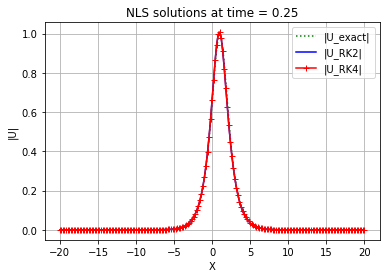

Time = 0.5
Errors with complex values
L2_Error_rk2 = 1.3248566352985358
L2_Error_rk4 = 1.3249403680274037
L_max_Error_rk2 = 0.4390315898040712
L_max_Error_rk4 = 0.43908868848658866
-----------------------------------
Errors with absolute values
L2_abs_Error_rk2 = 0.14275046022130514
L2_abs_Error_rk4 = 0.14295769855377624
L_max_abs_Error_rk2 = 0.05064139789438782
L_max_abs_Error_rk4 = 0.05071622631783901
------------------------------------


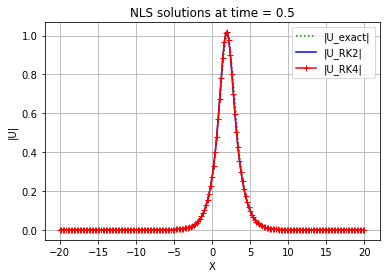

Time = 0.75
Errors with complex values
L2_Error_rk2 = 1.9841196594443606
L2_Error_rk4 = 1.9842562299332942
L_max_Error_rk2 = 0.6535116463416557
L_max_Error_rk4 = 0.6535933566708715
-----------------------------------
Errors with absolute values
L2_abs_Error_rk2 = 0.2194855101883759
L2_abs_Error_rk4 = 0.2198099901785125
L_max_abs_Error_rk2 = 0.07448057727250834
L_max_abs_Error_rk4 = 0.07460065896942947
------------------------------------


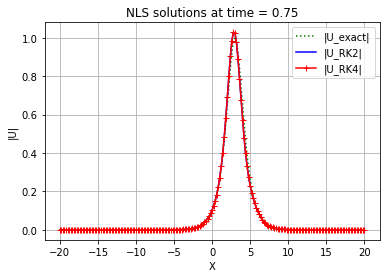

Time = 1.0
Errors with complex values
L2_Error_rk2 = 2.631721117563085
L2_Error_rk4 = 2.6319185913197107
L_max_Error_rk2 = 0.8629204806177427
L_max_Error_rk4 = 0.8630245415032622
-----------------------------------
Errors with absolute values
L2_abs_Error_rk2 = 0.2978763542375801
L2_abs_Error_rk4 = 0.29832449014266393
L_max_abs_Error_rk2 = 0.09676738491249248
L_max_abs_Error_rk4 = 0.09692769049666072
------------------------------------


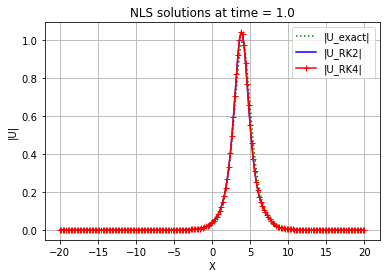

In [101]:
check_times = [1/4, 1/2, 3/4, 1.0]

for time in check_times:
    u_ex = u_exact[int((T-1) * time), :]
    u_sol_rk2 = u_RK2[int((T-1) * time), :]
    u_sol_rk4 = u_RK4[int((T-1) * time), :]
    print(f'Time = {end_time * time}')
    print(f'Errors with complex values')
    print(f'L2_Error_rk2 = {L2_error(u_ex, u_sol_rk2)}')
    print(f'L2_Error_rk4 = {L2_error(u_ex, u_sol_rk4)}')

    print(f'L_max_Error_rk2 = {Lmax_error(u_ex, u_sol_rk2)}')
    print(f'L_max_Error_rk4 = {Lmax_error(u_ex, u_sol_rk4)}')


    print(f'-----------------------------------')
    print(f'Errors with absolute values')
    print(f'L2_abs_Error_rk2 = {L2_error(np.abs(u_ex), np.abs(u_sol_rk2))}')
    print(f'L2_abs_Error_rk4 = {L2_error(np.abs(u_ex), np.abs(u_sol_rk4))}')

    print(f'L_max_abs_Error_rk2 = {Lmax_error(np.abs(u_ex), np.abs(u_sol_rk2))}')
    print(f'L_max_abs_Error_rk4 = {Lmax_error(np.abs(u_ex), np.abs(u_sol_rk4))}')

    print(f'------------------------------------')
    plt.title(f'NLS solutions at time = {end_time * time}')
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('|U|')
    plt.plot(x, np.abs(u_ex), label='|U_exact|', c='g', ls=':')
    plt.plot(x,  np.abs(u_sol_rk2), label='|U_RK2|', c='b', ls='-')
    plt.plot(x,  np.abs(u_sol_rk4), label='|U_RK4|', c='r', marker='+')
    plt.legend()
    plt.show()